4.331797235023042e-13


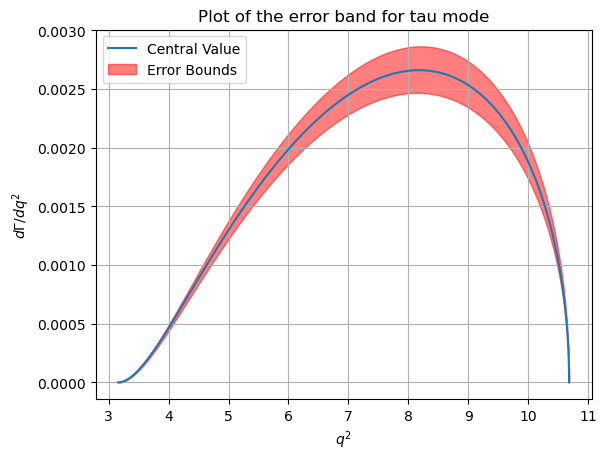

In [2]:
#for tau mode(for +/- error)( error and band drawing)

import numpy as np
from sympy import Symbol, integrate, sqrt, cos
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
#m_D = 1.86486
m_D_star= 2.01027
#m_B = 5.27955
m_B = 5.27925
m_b = 4.18
m_c = 1.275
m_tau = 1.77686

r = m_D_star/m_B  #r=r_D_star


# constants infront of r's and h
h_A1_1 = 0.906
rho_2 = 1.207
R_1_1 = 1.406
R_2_1 = 0.853

# Error values
error_R_1_1 = 0.033
error_R_2_1 = 0.020
error_rho_2 = 0.026
error_h_A1_1 = 0.013
error_V_cb = 1.1e-3

# Define upper and lower bounds for error
R_1_1_upper = R_1_1 + error_R_1_1
R_1_1_lower = R_1_1 - error_R_1_1
R_2_1_upper = R_2_1 + error_R_2_1
R_2_1_lower = R_2_1 - error_R_2_1
rho_2_upper = rho_2 + error_rho_2
rho_2_lower = rho_2 - error_rho_2
h_A1_1_upper = h_A1_1 + error_h_A1_1
h_A1_1_lower = h_A1_1 - error_h_A1_1
V_cb_upper = V_cb + error_V_cb
V_cb_lower = V_cb - error_V_cb

# Spacing and defining range
q_2 = np.linspace(m_tau**2, (m_B - m_D_star)**2, 10000)

def D_gamma(q_2):
  lamda_D = m_B**4 + m_D_star**4 + q_2**2 - 2 * m_B**2 * m_D_star**2 - 2 * m_D_star**2 * q_2 - 2 * m_B**2 * q_2




  # constants infront of r's and h
  h_A1_1 = 0.906
  rho_2 = 1.207
  R_1_1 = 1.406
  R_2_1 = 0.853

  #w's and z's
  w = (m_B**2+m_D_star**2-q_2)/(2*m_B*m_D_star)
  z = (np.sqrt(w+1)-np.sqrt(2))/(np.sqrt(w+1)+np.sqrt(2))

  #R's
  R_1 = R_1_1-0.12*(w-1)+0.05*(w-1)**2
  R_2 = R_2_1+0.11*(w-1)-0.06*(w-1)**2
  R_3 = 1.22-0.052*(w-1)+0.026*(w-1)**2

  # Print intermediate results
  # print("q_2:", q_2)
  # print("lamda_D", lamda_D)
  # print("w:", w)
  # print("z:", z)
  # print("R_1:", R_1)
  # print("R_2:", R_2)
  # print("R_3:", R_3)
  # print("r:", r)
  #h factors
  h_A1 = h_A1_1*(1-8*rho_2*z+(53*rho_2-15)*z**2-(231*rho_2-91)*z**3)
  h_V = R_1*h_A1

#  print("h_A1:", h_A1)
#  print("h_V:", h_V )


#  print("h_A1:" , h_A1)
#  print("h_V: ", h_V)

  h_A2 = ((R_2-R_3)/(2*r))*h_A1
  h_A3 = ((R_2+R_3)/2)*h_A1

#  print("h_A2:", h_A2)
#  print("h_A3:", h_A3)

  alpha = 1/(2*(1+r**2-2*r*w))
  h_T1_0 = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1
  h_T1_1 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V
  h_T1 = alpha*(h_T1_0 - h_T1_1)
# h_T1 = (1/(2*(1+r**(2)-2*r*w)))*(((m_b-m_c)/(m_B-m_D_star))*(1-r)**(2)*(w+1)*h_A1-((m_b+m_c)/(m_B+m_D_star))*(1+r)**(2)*(w-1)*h_V)

#  print("h_T1:", h_T1)

  beta =(1-r**2)*(w+1)*alpha
  h_T2_0 = ((m_b-m_c)/(m_B-m_D_star))*h_A1
  h_T2_1 = ((m_b+m_c)/(m_B+m_D_star))*h_V
  h_T2 = beta*(h_T2_0 - h_T2_1)
#  h_T2 = (((1-r**(2))*(w+1))/(2*(1+r**(2)-2*r*w)))*(((m_b-m_c)/(m_B-m_D_star)*h_A1)-(m_b+m_c)/(m_B+m_D_star)*h_V)


# h_T2 = (((1-r**(2))*(w+1))/(2*(1+r**(2)-2*r*w)))*((m_b-m_c)/(m_B-m_D_star)*h_A1-(m_b+m_c/m_B+m_D_star)*h_V)
#  print("h_T2:", h_T2)


  iota = alpha/(1+r)
  h_T3_0 = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1
  h_T3_1 = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3 - r*h_A2)
  h_T3_2 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V
  h_T3 = -iota*(h_T3_0 - h_T3_1 - h_T3_2)



#  h_T3 = (1/2*(1+r)*(1+r**(2)-2*r*w))*((2*((m_b-m_c)/(m_B-m_D_star)))*r*(w+1)*h_A1-((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3-r*h_A2)-((m_b+m_c)/(m_B+m_D_star))*(1+r)**(2)*h_V)

#  print("h_T3:", h_T3)



  sigma = (1/(2*(np.sqrt(m_B*m_D_star))))
  delta = (m_B+m_D_star)
  zeta = (m_B-m_D_star)

  #tensor matrix element
  T_1 = sigma*(delta*h_T1 - zeta*h_T2)
#  print("T_1:", T_1)

  T_2_0 = ((delta**2-q_2)/delta)*h_T1
  T_2_1 = ((zeta**2-q_2)/zeta)*h_T2
  T_2 = sigma*(T_2_0 - T_2_1)
#  print("T_2:", T_2)


  T_3_0 = zeta*h_T1
  T_3_1 = delta*h_T2
  T_3_2 = 2*((m_B**2-m_D_star**2)/m_B)*h_T3
  T_3 = sigma*(T_3_0 - T_3_1 - T_3_2)
#  print("T_3:", T_3)


#  T_1 = (1/2*np.sqrt(m_B*m_D_star))*((m_B+m_D_star)*h_T1-(m_B-m_D_star)*h_T2)
#  T_2 = (1/2*np.sqrt(m_B*m_D_star))*((((m_B+m_D_star)**2-q_2)/(m_B+m_D_star))*h_T1-(((m_B-m_D_star)**2-q_2)/(m_B-m_D_star))*h_T2)
#  T_3 = (1/2*np.sqrt(m_B*m_D_star))*((m_B-m_D_star)*h_T1-(m_B+m_D_star)*h_T2-2*((m_B**2-m_D_star**2)/m_B)*h_T3)

  #form_factor


  V = sigma*delta*h_V
#  print("V:", V)

  A_1 = sigma*((delta**2-q_2)/delta)*h_A1
#  print("A_1:", A_1)

  A_2 = delta*sigma*(h_A3 +(m_D_star/m_B)*h_A2)
#  print("A_2:", A_2)

  # A_0_0 = ((delta**2-q_2)/(2*m_D_star))*h_A1
  # A_0_1 = ((m_B**2 - m_D_star**2+q_2)/2*m_B)*h_A2
  # A_0_2 = ((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3
  # A_0 = sigma*(A_0_0 - A_0_1 - A_0_2)


#  V = (m_B+m_D_star)/(2*np.sqrt(m_B*m_D_star))*h_V
#  A_1 = (((m_B+m_D_star)**2-q_2)/(2*(np.sqrt(m_B*m_D_star))*(m_B+m_D_star)))*h_A1
#  A_2 = ((m_B+m_D_star)/(2*np.sqrt(m_B*m_D_star)))*(h_A3+(m_D_star/m_B)*h_A2)
  A_0 = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3))
#  print("A_0:", A_0)
  #hadronic helicity amplitude

#  H_V_0_0 = (m_B**2-m_D_star**2-q_2)*A_1
#  H_V_0_1 = (lamda_D/(m_B+m_D_star)**2)*A_2
#  H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-H_V_0_0 + H_V_0_1)

#  H_V_plus_0 = (m_B+m_D_star)*A_1
#  H_V_plus_1 = (np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  H_V_plus = H_V_plus_0 - H_V_plus_1


#  H_V_minus = H_V_plus_0 + H_V_plus_1

#  H_V_t = -np.sqrt(lamda_D/q_2)*A_0

#  H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0

#  H_T_0_0 = (m_B**2+3*m_D_star**2-q_2)*T_2
#  H_T_0_1 = (lamda_D/(m_B**2-m_D_star**2))*T_3
#  H_T_0 = (1/2*m_D_star)*(-H_T_0_0 + H_T_0_1)

#  H_T_plus_0 = (m_B**2-m_D_star**2)*T_2
#  H_T_plus_1 = np.sqrt(lamda_D)*T_1
#  H_T_plus = (1/np.sqrt(q_2))*(H_T_plus_0 + H_T_plus_1)


#  H_T_minus = (1/np.sqrt(q_2))*(-H_T_plus_0 + H_T_plus_1)





  H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1+ (lamda_D/(m_B+m_D_star)**2)*A_2)
#  print("H_V_0:", H_V_0)

  H_V_plus = (m_B+m_D_star)*A_1-(np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  print("H_V_plus:", H_V_plus)
  H_V_minus = (m_B+m_D_star)*A_1+(np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  print("H_V_minus:", H_V_minus)
  H_V_t = -(np.sqrt(lamda_D/q_2))*A_0
#  print("H_V_t:", H_V_t)
  H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0
#  print("H_S:", H_S)
  H_T_0 = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2+(lamda_D/(m_B**2-m_D_star**2))*T_3)
#  print("H_T_0:", H_T_0)
  H_T_plus = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)
#  print("H_T_plus:", H_T_plus)
  H_T_minus = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)
#  print("H_T_minus:", H_T_minus)

  #wiloson's coefficents
  C_V_LL = 0
  C_V_RL = 0
  C_T_LL = 0
  C_T_LL = 0
  C_R_LL = 0
  C_V_RR = 0
  C_V_LR = 0
  C_S_LL = 0
  C_S_RL = 0
  C_S_RR = 0
  C_S_LR = 0
  C_T_RR = 0




  #transversity amplitude
  A_L_0 = H_V_0*(1+C_V_LL-C_V_RL)
  A_L_11 = (1/np.sqrt(2))*(H_V_plus+H_V_minus)*(1+C_V_LL-C_V_RL)
  A_L_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(1+C_V_LL+C_V_RL)
  A_L_t = H_V_t*(1+C_V_LL-C_V_RL)
  A_L_P = H_S*(C_S_RL-C_S_LL)
  A_L_T0 = 2*H_T_0*C_T_LL
  A_L_T11 = np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_LL
  A_L_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_T_LL
  A_R_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_R_LL
  A_R_0 = H_V_0*(C_V_LR-C_V_RR)
  A_R_11 = (1/np.sqrt(2))*(H_V_plus + H_V_minus)*(C_V_LR-C_V_RR)
  A_R_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(C_V_LR+C_V_RR)
  A_R_t = H_V_t*(C_V_LR-C_V_RR)
  A_R_P = H_S*(C_S_RR-C_S_LR)
  A_R_T0 = -2*H_T_0*C_T_RR
  A_R_T11 = -np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_RR

  #extra trans Amp
  A_L_tP = A_L_t+(np.sqrt(q_2)/m_tau)*A_L_P
  A_R_tP = A_R_t+(np.sqrt(q_2)/m_tau)*A_R_P


  # print("A_L_0:",A_L_0 )
  # print("A_L_11:",A_L_11 )
  # print("A_L_90:",A_L_90 )
  # print("A_L_t:",A_L_t )
  # print("A_L_P:",A_L_P )
  # print("A_L_T0:",A_L_T0 )
  # print("A_L_T11:",A_L_T11 )
  # print("A_L_T90:",A_L_T90 )
  # print("A_R_T90:",A_R_T90 )
  # print("A_R_0:",A_R_0 )
  # print("A_R_11:",A_R_11 )
  # print("A_R_90:",A_R_90 )
  # print("A_R_t:",A_R_t )
  # print("A_R_P:",A_R_P )
  # print("A_R_T0:",A_R_T0 )
  # print("A_R_T11:",A_R_T11 )

  # branching fraction from D_star to D-pi
  B = 1

  #N_F(factor)
  N_F = ((G_F**2*(abs(V_cb))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_tau**2/q_2))**2*B
#  print("N_F: ", N_F)


  #Angular coefficients
#  I_C_1 = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_L_0))**2+4*(abs(A_L_T0))**2)-16*(m_tau/np.sqrt(q_2))*((abs(A_L_0*(np.conjugate(A_L_T0)))).real)+(4*m_tau**2/q_2)*(abs(A_L_tP))**2 + 2*(1+(m_tau**2/q_2))*((abs(A_R_0))**2+4*(abs(A_R_T0))**2)-16*(m_tau/np.sqrt(q_2))*((abs(A_R_0*(np.conjugate(A_R_T0)))).real)+(4*m_tau**2/q_2)*(abs(A_R_tP))**2 )
#  I_S_1 = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2) + 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90))**2+(abs(A_L_T11))**2) - (8*m_tau/np.sqrt(q_2))*((A_L_90*(np.conjugate(A_L_T90)))+A_L_11*(np.conjugate(A_L_T11))).real + 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2) + 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90))**2+(abs(A_R_T11))**2) - (8*m_tau/np.sqrt(q_2))*((A_R_90*(np.conjugate(A_R_T90)))+A_R_11*(np.conjugate(A_R_T11))).real)
#  I_C_2 = -2*N_F*(1-m_tau**2/q_2)*((abs(A_L_0))**2-4*((abs(A_L_T0))**2) + (abs(A_R_0))**2-4*((abs(A_R_T0))**2))
#  I_S_2 = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2-4*((abs(A_L_T90))**2+(abs(A_L_T11))**2) + (abs(A_R_90))**2+(abs(A_R_11))**2-4*((abs(A_R_T90))**2+(abs(A_R_T11))**2))


  #angular coefficents breakup
#  I_C_1_L = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_L_0))**2+4*((abs(A_L_T0)))**2)-((16*m_tau)/np.sqrt(q_2))*((A_L_0*np.conjugate(A_L_T0)).real) + ((4*m_tau**2)/q_2)*(abs(A_L_tP))**2)
#  I_C_1_R = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_R_0))**2+4*((abs(A_R_T0)))**2)-((16*m_tau)/np.sqrt(q_2))*((A_R_0*np.conjugate(A_R_T0)).real) + ((4*m_tau**2)/q_2)*(abs(A_R_tP))**2)
#  I_C_1 = I_C_1_L + I_C_1_R

#  I_S_1_L = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2)+2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90))**2+(abs(A_L_T11))**2) - 8*(m_tau/np.sqrt(q_2))*((A_L_90*np.conjugate(A_L_T90)+A_L_11*np.conjugate(A_L_T11)).real))
#  I_S_1_R = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2)+2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90))**2+(abs(A_R_T11))**2) - 8*(m_tau/np.sqrt(q_2))*((A_R_90*np.conjugate(A_R_T90)+A_R_11*np.conjugate(A_R_T11)).real))
#  I_S_1 = I_S_1_L + I_S_1_R

  I_C_2_L = -2*N_F*(1-(m_tau**2/q_2))*(((abs(A_L_0))**2-4*(abs(A_L_T0))**2))
  I_C_2_R = -2*N_F*(1-(m_tau**2/q_2))*(((abs(A_R_0))**2-4*(abs(A_R_T0))**2))
  I_C_2 = I_C_2_L + I_C_2_R
#  print("I_C_2: ", I_C_2)

#  I_S_2_L = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2-4*(abs(A_L_T90))**2-4*(abs(A_L_T11))**2)
#  I_S_2_R = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2-4*(abs(A_R_T90))**2-4*(abs(A_R_T11))**2)
#  I_S_2 = I_S_2_L + I_S_2_R

  #angular Coefficents's breakup
  I_C_1_L_0 = 2*(1+(m_tau**2/q_2))*((abs(A_L_0))**2 + 4*(abs(A_L_T0))**2)
  I_C_1_L_1 = 16*(m_tau/np.sqrt(q_2))*((A_L_0*(np.conjugate(A_L_T0))).real)
  I_C_1_L_2 = 4*(m_tau**2/q_2)*(abs(A_L_tP))**2

  I_C_1_R_0 = 2*(1+(m_tau**2/q_2))*((abs(A_R_0))**2 + 4*(abs(A_R_T0))**2)
  I_C_1_R_1 = 16*(m_tau/np.sqrt(q_2))*((A_R_0*(np.conjugate(A_R_T0))).real)
  I_C_1_R_2 = 4*(m_tau**2/q_2)*(abs(A_R_tP))**2

  I_C_1 = N_F*(I_C_1_L_0 - I_C_1_L_1 + I_C_1_L_2 + I_C_1_R_0 - I_C_1_R_1 + I_C_1_R_2) # final I_C_1
#  print("I_C_1: ", I_C_1)


  I_S_1_L_0 = 0.5*(3+(m_tau**2/q_2))*((abs(A_L_90))**2 + (abs(A_L_11))**2)
  I_S_1_L_1 = 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90))**2 + (abs(A_L_T11))**2)
  I_S_1_L_2 = 8*(m_tau/np.sqrt(q_2))*((A_L_90*(np.conjugate(A_L_T90)) + A_L_11*(np.conjugate(A_L_T11))).real)

  I_S_1_R_0 = 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90))**2 + (abs(A_R_11))**2)
  I_S_1_R_1 = 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90))**2 + (abs(A_R_T11))**2)
  I_S_1_R_2 = 8*(m_tau/np.sqrt(q_2))*((A_R_90*(np.conjugate(A_R_T90)) + A_R_11*(np.conjugate(A_R_T11))).real)

  I_S_1 = N_F*(I_S_1_L_0 + I_S_1_L_1 - I_S_1_L_2 + I_S_1_R_0 + I_S_1_R_1 - I_S_1_R_2 )  # final I_S_1
#  print("I_S_1: ", I_S_1)

#  I_C_2_L_0 = (abs(A_L_0))**2
#  I_C_2_L_1 = (abs(A_L_T0))**2

#  I_C_2_R_0 = (abs(A_R_0))**2
#  I_C_2_R_1 = (abs(A_R_T0))**2

#  I_C_2 = -2*N_F*(1-(m_tau**2/q_2))(I_C_2_L_0 - I_C_2_L_1 + I_C_2_R_0 - I_C_2_R_1)  #final I_C_2

  I_S_2_L_0 = (abs(A_L_90))**2 + (abs(A_L_11))**2
  I_S_2_L_1 = 4*((abs(A_L_T90))**2 + (abs(A_L_T11))**2)

  I_S_2_R_0 = (abs(A_R_90))**2 + (abs(A_R_11))**2
  I_S_2_R_1 = 4*((abs(A_R_T90))**2 + (abs(A_R_T11))**2)

  I_S_2 = (1/2)*N_F*(1-(m_tau**2/q_2))*(I_S_2_L_0 - I_S_2_L_1 + I_S_2_R_0 - I_S_2_R_1) #final I_S_2
#  print("I_S_2: ", I_S_2)

  # d-gamma
  D_gamma = (1/4)*(3*I_C_1 + 6*I_S_1 - I_C_2 - 2*I_S_2)
#  print("D_gamma: ", D_gamma)
  return(D_gamma)

# Function to calculate D_gamma with errors
def D_gamma_upper(q_2):
  #w's and z's
    w = (m_B**2+m_D_star**2-q_2)/(2*m_B*m_D_star)
    z = (np.sqrt(w+1)-np.sqrt(2))/(np.sqrt(w+1)+np.sqrt(2))
    # Use upper and lower bounds for constants with errors
    R_1_upper = R_1_1_upper - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    #R_1_lower = R_1_1_lower - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    R_2_upper = R_2_1_upper + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    #R_2_lower = R_2_1_lower + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    rho_2_upper = 1.207 + error_rho_2
    #rho_2_lower = 1.207 - error_rho_2
    h_A1_upper = h_A1_1_upper * (1 - 8 * rho_2_upper * z + (53 * rho_2_upper - 15) * z ** 2 - (231 * rho_2_upper - 91) * z ** 3)
    #h_A1_lower = h_A1_1_lower * (1 - 8 * rho_2_lower * z + (53 * rho_2_lower - 15) * z ** 2 - (231 * rho_2_lower - 91) * z ** 3)
    V_cb_upper = V_cb + error_V_cb
    #V_cb_lower = V_cb - error_V_cb
    R_3 = 1.22-0.052*(w-1)+0.026*(w-1)**2
    R_1 = R_1_1 - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    R_2 = R_2_1 + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    h_A1 = h_A1_1 * (1 - 8 * rho_2 * z + (53 * rho_2- 15) * z ** 2 - (231 * rho_2 - 91) * z ** 3)


    # Calculate D_gamma with errors
    lamda_D = m_B**4 + m_D_star**4 + q_2**2 - 2 * m_B**2 * m_D_star**2 - 2 * m_D_star**2 * q_2 - 2 * m_B**2 * q_2

    h_V_u = R_1_upper*h_A1_upper
    #h_V_l = R_1_lower*h_A1_upper
    #h_V = R_1*h_A1



    h_A2_u = ((R_2_upper-R_3)/(2*r))*h_A1_upper
    #h_A2_l = ((R_2_upper-R_3)/(2*r))*h_A1_lower
    #h_A2 = ((R_2-R_3)/(2*r))*h_A1

    h_A3_u = ((R_2_upper+R_3)/2)*h_A1_upper
    #h_A3_l = ((R_2_lower+R_3)/2)*h_A1_lower
    #h_A3 = ((R_2_upper+R_3)/2)*h_A1


    alpha = 1/(2*(1+r**2-2*r*w))

    h_T1_0_u = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1_upper
    #h_T1_0_l = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1_lower
    #h_T1_0 = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1


    h_T1_1_u = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V_u
    #h_T1_1_l = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V_l
    #h_T1_1 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V

    h_T1_u = alpha*(h_T1_0_u - h_T1_1_u)
    #h_T1_l = alpha*(h_T1_0_l - h_T1_1_l)
    #h_T1 = alpha*(h_T1_0 - h_T1_1)


    beta =(1-r**2)*(w+1)*alpha

    h_T2_0_u = ((m_b-m_c)/(m_B-m_D_star))*h_A1_upper
    #h_T2_0_l = ((m_b-m_c)/(m_B-m_D_star))*h_A1_lower
    #h_T2_0 = ((m_b-m_c)/(m_B-m_D_star))*h_A1

    h_T2_1_u = ((m_b+m_c)/(m_B+m_D_star))*h_V_u
    #h_T2_1_l = ((m_b+m_c)/(m_B+m_D_star))*h_V_l
    #h_T2_1 = ((m_b+m_c)/(m_B+m_D_star))*h_V

    h_T2_u = beta*(h_T2_0_u - h_T2_1_u)
    #h_T2_l = beta*(h_T2_0_l - h_T2_1_l)
    #h_T2 = beta*(h_T2_0 - h_T2_1)



    iota = alpha/(1+r)

    h_T3_0_u = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1_upper
    #h_T3_0_l = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1_lower
    #h_T3_0 = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1

    h_T3_1_u = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3_u - r*h_A2_u)
    #h_T3_1_l = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3_l - r*h_A2_l)
    #h_T3_1 = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3 - r*h_A2)


    h_T3_2_u = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V_u
    #h_T3_2_l = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V_l
    #h_T3_2 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V


    h_T3_u = -iota*(h_T3_0_u - h_T3_1_u - h_T3_2_u)
    #h_T3_l = -iota*(h_T3_0_l - h_T3_1_l - h_T3_2_l)
    #h_T3 = -iota*(h_T3_0 - h_T3_1 - h_T3_2)

    sigma = (1/(2*(np.sqrt(m_B*m_D_star))))
    delta = (m_B+m_D_star)
    zeta = (m_B-m_D_star)

    #tensor matrix element
    T_1_u = sigma*(delta*h_T1_u - zeta*h_T2_u)
    #T_1_l = sigma*(delta*h_T1_l - zeta*h_T2_l)
    #T_1 = sigma*(delta*h_T1 - zeta*h_T2)


    T_2_0_u = ((delta**2-q_2)/delta)*h_T1_u
    #T_2_0_l = ((delta**2-q_2)/delta)*h_T1_l
    #T_2_0 = ((delta**2-q_2)/delta)*h_T1

    T_2_1_u = ((zeta**2-q_2)/zeta)*h_T2_u
    #T_2_1_l = ((zeta**2-q_2)/zeta)*h_T2_l
    #T_2_1 = ((zeta**2-q_2)/zeta)*h_T2



    T_2_u = sigma*(T_2_0_u - T_2_1_u)
    #T_2_l = sigma*(T_2_0_l - T_2_1_l)
    #T_2 = sigma*(T_2_0 - T_2_1)



    T_3_0_u = zeta*h_T1_u
    #T_3_0_l = zeta*h_T1_l
    #T_3_0 = zeta*h_T1


    T_3_1_u = delta*h_T2_u
    #T_3_1_l = delta*h_T2_l
    #T_3_1 = delta*h_T2

    T_3_2_u = 2*((m_B**2-m_D_star**2)/m_B)*h_T3_u
    #T_3_2_l = 2*((m_B**2-m_D_star**2)/m_B)*h_T3_l
    #T_3_2 = 2*((m_B**2-m_D_star**2)/m_B)*h_T3

    T_3_u = sigma*(T_3_0_u - T_3_1_u - T_3_2_u)
    #T_3_l = sigma*(T_3_0_l - T_3_1_l - T_3_2_l)
    #T_3 = sigma*(T_3_0 - T_3_1 - T_3_2)

    #form_factor


    V_u = sigma*delta*h_V_u
    #V_l = sigma*delta*h_V_l
    #V = sigma*delta*h_V


    A_1_u = sigma*((delta**2-q_2)/delta)*h_A1_upper
    #A_1_l = sigma*((delta**2-q_2)/delta)*h_A1_lower
    #A_1 = sigma*((delta**2-q_2)/delta)*h_A1


    A_2_u = delta*sigma*(h_A3_u +(m_D_star/m_B)*h_A2_u)
    #A_2_l = delta*sigma*(h_A3_l +(m_D_star/m_B)*h_A2_l)
    #A_2 = delta*sigma*(h_A3 +(m_D_star/m_B)*h_A2)

    A_0_u = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1_upper-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2_u-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3_u))
    #A_0_l = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1_lower-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2_l-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3_l))
    #A_0 = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3))
    #hadronic helicity amplitude



    H_V_0_u = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1_u+ (lamda_D/(m_B+m_D_star)**2)*A_2_u)
    #H_V_0_l = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1_l+ (lamda_D/(m_B+m_D_star)**2)*A_2_l)
    #H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1+ (lamda_D/(m_B+m_D_star)**2)*A_2)


    H_V_plus_u = (m_B+m_D_star)*A_1_u-(np.sqrt(lamda_D)/(m_B+m_D_star))*V_u
    #H_V_plus_l = (m_B+m_D_star)*A_1_l-(np.sqrt(lamda_D)/(m_B+m_D_star))*V_l
    #H_V_plus = (m_B+m_D_star)*A_1-(np.sqrt(lamda_D)/(m_B+m_D_star))*V

    H_V_minus_u = (m_B+m_D_star)*A_1_u+(np.sqrt(lamda_D)/(m_B+m_D_star))*V_u
    #H_V_minus_l = (m_B+m_D_star)*A_1_l+(np.sqrt(lamda_D)/(m_B+m_D_star))*V_l
    #H_V_minus = (m_B+m_D_star)*A_1+(np.sqrt(lamda_D)/(m_B+m_D_star))*V

    H_V_t_u = -(np.sqrt(lamda_D/q_2))*A_0_u
    #H_V_t_l = -(np.sqrt(lamda_D/q_2))*A_0_l
    #H_V_t = -(np.sqrt(lamda_D/q_2))*A_0

    H_S_u = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0_u
    #H_S_l = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0_l
    #H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0

    H_T_0_u = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2_u+(lamda_D/(m_B**2-m_D_star**2))*T_3_u)
    #H_T_0_l = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2_l+(lamda_D/(m_B**2-m_D_star**2))*T_3_l)
    #H_T_0 = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2+(lamda_D/(m_B**2-m_D_star**2))*T_3)

    H_T_plus_u = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2_u+np.sqrt(lamda_D)*T_1_u)
    #H_T_plus_l = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2_l+np.sqrt(lamda_D)*T_1_l)
    #H_T_plus = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)

    H_T_minus_u = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2_u+np.sqrt(lamda_D)*T_1_u)
    #H_T_minus_l = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2_l+np.sqrt(lamda_D)*T_1_l)
    #H_T_minus = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)



    #wiloson's coefficents
    C_V_LL = 0
    C_V_RL = 0
    C_T_LL = 0
    C_T_LL = 0
    C_R_LL = 0
    C_V_RR = 0
    C_V_LR = 0
    C_S_LL = 0
    C_S_RL = 0
    C_S_RR = 0
    C_S_LR = 0
    C_T_RR = 0




    #transversity amplitude
    A_L_0_u = H_V_0_u*(1+C_V_LL-C_V_RL)
    #A_L_0_l = H_V_0_l*(1+C_V_LL-C_V_RL)
    #A_L_0 = H_V_0*(1+C_V_LL-C_V_RL)

    A_L_11_u = (1/np.sqrt(2))*(H_V_plus_u+H_V_minus_u)*(1+C_V_LL-C_V_RL)
    #A_L_11_l = (1/np.sqrt(2))*(H_V_plus_l+H_V_minus_l)*(1+C_V_LL-C_V_RL)
    #A_L_11 = (1/np.sqrt(2))*(H_V_plus+H_V_minus)*(1+C_V_LL-C_V_RL)

    A_L_90_u = (1/np.sqrt(2))*(H_V_plus_u-H_V_minus_u)*(1+C_V_LL+C_V_RL)
    #A_L_90_l = (1/np.sqrt(2))*(H_V_plus_l-H_V_minus_l)*(1+C_V_LL+C_V_RL)
    #A_L_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(1+C_V_LL+C_V_RL)

    A_L_t_u = H_V_t_u*(1+C_V_LL-C_V_RL)
    #A_L_t_l = H_V_t_l*(1+C_V_LL-C_V_RL)
    #A_L_t = H_V_t*(1+C_V_LL-C_V_RL)

    A_L_P_u = H_S_u*(C_S_RL-C_S_LL)
    #A_L_P_l = H_S_l*(C_S_RL-C_S_LL)
    #A_L_P = H_S*(C_S_RL-C_S_LL)

    A_L_T0_u = 2*H_T_0_u*C_T_LL
    #A_L_T0_l = 2*H_T_0_l*C_T_LL
    #A_L_T0 = 2*H_T_0*C_T_LL

    A_L_T11_u = np.sqrt(2)*(H_T_plus_u-H_T_minus_u)*C_T_LL
    #A_L_T11_l = np.sqrt(2)*(H_T_plus_l-H_T_minus_l)*C_T_LL
    #A_L_T11 = np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_LL

    A_L_T90_u = np.sqrt(2)*(H_T_plus_u+H_T_minus_u)*C_T_LL
    #A_L_T90_l = np.sqrt(2)*(H_T_plus_l+H_T_minus_l)*C_T_LL
    #A_L_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_T_LL

    A_R_T90_u = np.sqrt(2)*(H_T_plus_u+H_T_minus_u)*C_R_LL
    #A_R_T90_l = np.sqrt(2)*(H_T_plus_l+H_T_minus_l)*C_R_LL
    #A_R_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_R_LL



    A_R_0_u = H_V_0_u*(C_V_LR-C_V_RR)
    #A_R_0_l = H_V_0_l*(C_V_LR-C_V_RR)
    #A_R_0 = H_V_0*(C_V_LR-C_V_RR)

    A_R_11_u = (1/np.sqrt(2))*(H_V_plus_u + H_V_minus_u)*(C_V_LR-C_V_RR)
    #A_R_11_l = (1/np.sqrt(2))*(H_V_plus_l + H_V_minus_l)*(C_V_LR-C_V_RR)
    #A_R_11 = (1/np.sqrt(2))*(H_V_plus + H_V_minus)*(C_V_LR-C_V_RR)

    A_R_90_u = (1/np.sqrt(2))*(H_V_plus_u-H_V_minus_u)*(C_V_LR+C_V_RR)
    #A_R_90_l = (1/np.sqrt(2))*(H_V_plus_l-H_V_minus_l)*(C_V_LR+C_V_RR)
    #A_R_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(C_V_LR+C_V_RR)

    A_R_t_u = H_V_t_u*(C_V_LR-C_V_RR)
    #A_R_t_l = H_V_t_l*(C_V_LR-C_V_RR)
    #A_R_t = H_V_t*(C_V_LR-C_V_RR)


    A_R_P_u = H_S_u*(C_S_RR-C_S_LR)
    #A_R_P_l = H_S_l*(C_S_RR-C_S_LR)
    #A_R_P = H_S*(C_S_RR-C_S_LR)


    A_R_T0_u = -2*H_T_0_u*C_T_RR
    #A_R_T0_l = -2*H_T_0_l*C_T_RR
    #A_R_T0 = -2*H_T_0*C_T_RR


    A_R_T11_u = -np.sqrt(2)*(H_T_plus_u-H_T_minus_u)*C_T_RR
    #A_R_T11_l = -np.sqrt(2)*(H_T_plus_l-H_T_minus_l)*C_T_RR
    #A_R_T11_u = -np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_RR



    #extra trans Amp
    A_L_tP_u = A_L_t_u+(np.sqrt(q_2)/m_tau)*A_L_P_u
    #A_L_tP_l = A_L_t_l+(np.sqrt(q_2)/m_tau)*A_L_P_l


    A_R_tP_u = A_R_t_u+(np.sqrt(q_2)/m_tau)*A_R_P_u
    #A_R_tP_l = A_R_t_l+(np.sqrt(q_2)/m_tau)*A_R_P_l



    # branching fraction from D_star to D-pi
    B = 1

    #N_F(factor)
    N_F_u = ((G_F**2*(abs(V_cb_upper))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_tau**2/q_2))**2*B
    #N_F_l = ((G_F**2*(abs(V_cb_lower))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_tau**2/q_2))**2*B


  #  print("N_F: ", N_F)


    #Angular coefficients

    I_C_2_L_u = -2*N_F_u*(1-(m_tau**2/q_2))*(((abs(A_L_0_u))**2-4*(abs(A_L_T0_u))**2))
    #I_C_2_L_l = -2*N_F_l*(1-(m_tau**2/q_2))*(((abs(A_L_0_l))**2-4*(abs(A_L_T0_l))**2))


    I_C_2_R_u = -2*N_F_u*(1-(m_tau**2/q_2))*(((abs(A_R_0_u))**2-4*(abs(A_R_T0_u))**2))
    #I_C_2_R_l = -2*N_F_l*(1-(m_tau**2/q_2))*(((abs(A_R_0_l))**2-4*(abs(A_R_T0_l))**2))

    I_C_2_u = I_C_2_L_u + I_C_2_R_u
    #I_C_2_l = I_C_2_L_l + I_C_2_R_l

    #angular Coefficents's breakup
    I_C_1_L_0_u = 2*(1+(m_tau**2/q_2))*((abs(A_L_0_u))**2 + 4*(abs(A_L_T0_u))**2)
    #I_C_1_L_0_l = 2*(1+(m_tau**2/q_2))*((abs(A_L_0_l))**2 + 4*(abs(A_L_T0_l))**2)


    I_C_1_L_1_u = 16*(m_tau/np.sqrt(q_2))*((A_L_0_u*(np.conjugate(A_L_T0_u))).real)
    #I_C_1_L_1_l = 16*(m_tau/np.sqrt(q_2))*((A_L_0_l*(np.conjugate(A_L_T0_l))).real)


    I_C_1_L_2_u = 4*(m_tau**2/q_2)*(abs(A_L_tP_u))**2
    #I_C_1_L_2_l = 4*(m_tau**2/q_2)*(abs(A_L_tP_l))**2

    I_C_1_R_0_u = 2*(1+(m_tau**2/q_2))*((abs(A_R_0_u))**2 + 4*(abs(A_R_T0_u))**2)
    #I_C_1_R_0_l = 2*(1+(m_tau**2/q_2))*((abs(A_R_0_l))**2 + 4*(abs(A_R_T0_l))**2)




    I_C_1_R_1_u = 16*(m_tau/np.sqrt(q_2))*((A_R_0_u*(np.conjugate(A_R_T0_u))).real)
    #I_C_1_R_1_l = 16*(m_tau/np.sqrt(q_2))*((A_R_0_l*(np.conjugate(A_R_T0_l))).real)


    I_C_1_R_2_u = 4*(m_tau**2/q_2)*(abs(A_R_tP_u))**2
    #I_C_1_R_2_l = 4*(m_tau**2/q_2)*(abs(A_R_tP_l))**2

    I_C_1_u = N_F_u*(I_C_1_L_0_u - I_C_1_L_1_u + I_C_1_L_2_u + I_C_1_R_0_u - I_C_1_R_1_u + I_C_1_R_2_u) # final I_C_1
    #I_C_1_l = N_F_l*(I_C_1_L_0_l - I_C_1_L_1_l + I_C_1_L_2_l + I_C_1_R_0_l - I_C_1_R_1_l + I_C_1_R_2_l) # final I_C_1
  #  print("I_C_1: ", I_C_1)


    I_S_1_L_0_u = 0.5*(3+(m_tau**2/q_2))*((abs(A_L_90_u))**2 + (abs(A_L_11_u))**2)
    #I_S_1_L_0_l = 0.5*(3+(m_tau**2/q_2))*((abs(A_L_90_l))**2 + (abs(A_L_11_l))**2)


    I_S_1_L_1_u = 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90_u))**2 + (abs(A_L_T11_u))**2)
    #I_S_1_L_1_l = 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90_l))**2 + (abs(A_L_T11_l))**2)


    I_S_1_L_2_u = 8*(m_tau/np.sqrt(q_2))*((A_L_90_u*(np.conjugate(A_L_T90_u)) + A_L_11_u*(np.conjugate(A_L_T11_u))).real)
    #I_S_1_L_2_l = 8*(m_tau/np.sqrt(q_2))*((A_L_90_l*(np.conjugate(A_L_T90_l)) + A_L_11_l*(np.conjugate(A_L_T11_l))).real)

    I_S_1_R_0_u = 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90_u))**2 + (abs(A_R_11_u))**2)
    #I_S_1_R_0_l = 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90_l))**2 + (abs(A_R_11_l))**2)


    I_S_1_R_1_u = 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90_u))**2 + (abs(A_R_T11_u))**2)
    #I_S_1_R_1_l = 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90_l))**2 + (abs(A_R_T11_l))**2)


    I_S_1_R_2_u = 8*(m_tau/np.sqrt(q_2))*((A_R_90_u*(np.conjugate(A_R_T90_u)) + A_R_11_u*(np.conjugate(A_R_T11_u))).real)
    #I_S_1_R_2_l = 8*(m_tau/np.sqrt(q_2))*((A_R_90_l*(np.conjugate(A_R_T90_l)) + A_R_11_l*(np.conjugate(A_R_T11_u))).real)

    I_S_1_u = N_F_u*(I_S_1_L_0_u + I_S_1_L_1_u - I_S_1_L_2_u + I_S_1_R_0_u + I_S_1_R_1_u - I_S_1_R_2_u )  # final I_S_1
    #I_S_1_l = N_F_l*(I_S_1_L_0_l + I_S_1_L_1_l - I_S_1_L_2_l + I_S_1_R_0_l + I_S_1_R_1_l - I_S_1_R_2_l )  # final I_S_1



    I_S_2_L_0_u = (abs(A_L_90_u))**2 + (abs(A_L_11_u))**2
    #I_S_2_L_0_l = (abs(A_L_90_l))**2 + (abs(A_L_11_l))**2


    I_S_2_L_1_u = 4*((abs(A_L_T90_u))**2 + (abs(A_L_T11_u))**2)
    #I_S_2_L_1_l = 4*((abs(A_L_T90_u))**2 + (abs(A_L_T11_u))**2)

    I_S_2_R_0_u = (abs(A_R_90_u))**2 + (abs(A_R_11_u))**2
    #I_S_2_R_0_l = (abs(A_R_90_l))**2 + (abs(A_R_11_l))**2

    I_S_2_R_1_u = 4*((abs(A_R_T90_u))**2 + (abs(A_R_T11_u))**2)
    #I_S_2_R_1_l = 4*((abs(A_R_T90_l))**2 + (abs(A_R_T11_l))**2)

    I_S_2_u = (1/2)*N_F_u*(1-(m_tau**2/q_2))*(I_S_2_L_0_u - I_S_2_L_1_u + I_S_2_R_0_u - I_S_2_R_1_u) #final I_S_2
    #I_S_2_l = (1/2)*N_F_u*(1-(m_tau**2/q_2))*(I_S_2_L_0_u - I_S_2_L_1_u + I_S_2_R_0_u - I_S_2_R_1_u) #final I_S_2
  #  print("I_S_2: ", I_S_2)

    # d-gamma
    D_gamma_upper = (1/4)*(3*I_C_1_u + 6*I_S_1_u - I_C_2_u - 2*I_S_2_u)
    #D_gamma_lower = (1/4)*(3*I_C_1_l + 6*I_S_1_l - I_C_2_l - 2*I_S_2_l)
  #  print("D_gamma: ", D_gamma)
    return (D_gamma_upper)

def D_gamma_lower(q_2):
    #w's and z's
    w = (m_B**2+m_D_star**2-q_2)/(2*m_B*m_D_star)
    z = (np.sqrt(w+1)-np.sqrt(2))/(np.sqrt(w+1)+np.sqrt(2))
    # Use upper and lower bounds for constants with errors
    #R_1_upper = R_1_1_upper - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    R_1_lower = R_1_1_lower - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    #R_2_upper = R_2_1_upper + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    R_2_lower = R_2_1_lower + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    #rho_2_upper = 1.207 + error_rho_2
    rho_2_lower = 1.207 - error_rho_2
    #h_A1_upper = h_A1_1_upper * (1 - 8 * rho_2_upper * z + (53 * rho_2_upper - 15) * z ** 2 - (231 * rho_2_upper - 91) * z ** 3)
    h_A1_lower = h_A1_1_lower * (1 - 8 * rho_2_lower * z + (53 * rho_2_lower - 15) * z ** 2 - (231 * rho_2_lower - 91) * z ** 3)
    #V_cb_upper = V_cb + error_V_cb
    V_cb_lower = V_cb - error_V_cb
    R_3 = 1.22-0.052*(w-1)+0.026*(w-1)**2
    R_1 = R_1_1 - 0.12 * (w - 1) + 0.05 * (w - 1) ** 2
    R_2 = R_2_1 + 0.11 * (w - 1) - 0.06 * (w - 1) ** 2
    h_A1 = h_A1_1 * (1 - 8 * rho_2 * z + (53 * rho_2- 15) * z ** 2 - (231 * rho_2 - 91) * z ** 3)


    # Calculate D_gamma with errors
    lamda_D = m_B**4 + m_D_star**4 + q_2**2 - 2 * m_B**2 * m_D_star**2 - 2 * m_D_star**2 * q_2 - 2 * m_B**2 * q_2

    #h_V_u = R_1_upper*h_A1_upper
    h_V_l = R_1_lower*h_A1_lower
    #h_V = R_1*h_A1



    #h_A2_u = ((R_2_upper-R_3)/(2*r))*h_A1_upper
    h_A2_l = ((R_2_lower-R_3)/(2*r))*h_A1_lower
    #h_A2 = ((R_2-R_3)/(2*r))*h_A1

    #h_A3_u = ((R_2_upper+R_3)/2)*h_A1_upper
    h_A3_l = ((R_2_lower+R_3)/2)*h_A1_lower
    #h_A3 = ((R_2_upper+R_3)/2)*h_A1


    alpha = 1/(2*(1+r**2-2*r*w))

    #h_T1_0_u = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1_upper
    h_T1_0_l = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1_lower
    #h_T1_0 = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1


    #h_T1_1_u = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V_u
    h_T1_1_l = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V_l
    #h_T1_1 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V

    #h_T1_u = alpha*(h_T1_0_u - h_T1_1_u)
    h_T1_l = alpha*(h_T1_0_l - h_T1_1_l)
    #h_T1 = alpha*(h_T1_0 - h_T1_1)


    beta =(1-r**2)*(w+1)*alpha

    #h_T2_0_u = ((m_b-m_c)/(m_B-m_D_star))*h_A1_upper
    h_T2_0_l = ((m_b-m_c)/(m_B-m_D_star))*h_A1_lower
    #h_T2_0 = ((m_b-m_c)/(m_B-m_D_star))*h_A1

    #h_T2_1_u = ((m_b+m_c)/(m_B+m_D_star))*h_V_u
    h_T2_1_l = ((m_b+m_c)/(m_B+m_D_star))*h_V_l
    #h_T2_1 = ((m_b+m_c)/(m_B+m_D_star))*h_V

    #h_T2_u = beta*(h_T2_0_u - h_T2_1_u)
    h_T2_l = beta*(h_T2_0_l - h_T2_1_l)
    #h_T2 = beta*(h_T2_0 - h_T2_1)



    iota = alpha/(1+r)

    #h_T3_0_u = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1_upper
    h_T3_0_l = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1_lower
    #h_T3_0 = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1

    #h_T3_1_u = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3_u - r*h_A2_u)
    h_T3_1_l = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3_l - r*h_A2_l)
    #h_T3_1 = ((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3 - r*h_A2)


    #h_T3_2_u = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V_u
    h_T3_2_l = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V_l
    #h_T3_2 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V


    #h_T3_u = -iota*(h_T3_0_u - h_T3_1_u - h_T3_2_u)
    h_T3_l = -iota*(h_T3_0_l - h_T3_1_l - h_T3_2_l)
    #h_T3 = -iota*(h_T3_0 - h_T3_1 - h_T3_2)

    sigma = (1/(2*(np.sqrt(m_B*m_D_star))))
    delta = (m_B+m_D_star)
    zeta = (m_B-m_D_star)

    #tensor matrix element
    #T_1_u = sigma*(delta*h_T1_u - zeta*h_T2_u)
    T_1_l = sigma*(delta*h_T1_l - zeta*h_T2_l)
    #T_1 = sigma*(delta*h_T1 - zeta*h_T2)


    #T_2_0_u = ((delta**2-q_2)/delta)*h_T1_u
    T_2_0_l = ((delta**2-q_2)/delta)*h_T1_l
    #T_2_0 = ((delta**2-q_2)/delta)*h_T1

    #T_2_1_u = ((zeta**2-q_2)/zeta)*h_T2_u
    T_2_1_l = ((zeta**2-q_2)/zeta)*h_T2_l
    #T_2_1 = ((zeta**2-q_2)/zeta)*h_T2



    #T_2_u = sigma*(T_2_0_u - T_2_1_u)
    T_2_l = sigma*(T_2_0_l - T_2_1_l)
    #T_2 = sigma*(T_2_0 - T_2_1)



    #T_3_0_u = zeta*h_T1_u
    T_3_0_l = zeta*h_T1_l
    #T_3_0 = zeta*h_T1


    #T_3_1_u = delta*h_T2_u
    T_3_1_l = delta*h_T2_l
    #T_3_1 = delta*h_T2

    #T_3_2_u = 2*((m_B**2-m_D_star**2)/m_B)*h_T3_u
    T_3_2_l = 2*((m_B**2-m_D_star**2)/m_B)*h_T3_l
    #T_3_2 = 2*((m_B**2-m_D_star**2)/m_B)*h_T3

    #T_3_u = sigma*(T_3_0_u - T_3_1_u - T_3_2_u)
    T_3_l = sigma*(T_3_0_l - T_3_1_l - T_3_2_l)
    #T_3 = sigma*(T_3_0 - T_3_1 - T_3_2)

    #form_factor


    #V_u = sigma*delta*h_V_u
    V_l = sigma*delta*h_V_l
    #V = sigma*delta*h_V


    #A_1_u = sigma*((delta**2-q_2)/delta)*h_A1_upper
    A_1_l = sigma*((delta**2-q_2)/delta)*h_A1_lower
    #A_1 = sigma*((delta**2-q_2)/delta)*h_A1


    #A_2_u = delta*sigma*(h_A3_u +(m_D_star/m_B)*h_A2_u)
    A_2_l = delta*sigma*(h_A3_l +(m_D_star/m_B)*h_A2_l)
    #A_2 = delta*sigma*(h_A3 +(m_D_star/m_B)*h_A2)

    #A_0_u = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1_upper-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2_u-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3_u))
    A_0_l = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1_lower-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2_l-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3_l))
    #A_0 = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3))
    #hadronic helicity amplitude



    #H_V_0_u = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1_u+ (lamda_D/(m_B+m_D_star)**2)*A_2_u)
    H_V_0_l = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1_l+ (lamda_D/(m_B+m_D_star)**2)*A_2_l)
    #H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1+ (lamda_D/(m_B+m_D_star)**2)*A_2)


    #H_V_plus_u = (m_B+m_D_star)*A_1_u-(np.sqrt(lamda_D)/(m_B+m_D_star))*V_u
    H_V_plus_l = (m_B+m_D_star)*A_1_l-(np.sqrt(lamda_D)/(m_B+m_D_star))*V_l
    #H_V_plus = (m_B+m_D_star)*A_1-(np.sqrt(lamda_D)/(m_B+m_D_star))*V

    #H_V_minus_u = (m_B+m_D_star)*A_1_u+(np.sqrt(lamda_D)/(m_B+m_D_star))*V_u
    H_V_minus_l = (m_B+m_D_star)*A_1_l+(np.sqrt(lamda_D)/(m_B+m_D_star))*V_l
    #H_V_minus = (m_B+m_D_star)*A_1+(np.sqrt(lamda_D)/(m_B+m_D_star))*V

    #H_V_t_u = -(np.sqrt(lamda_D/q_2))*A_0_u
    H_V_t_l = -(np.sqrt(lamda_D/q_2))*A_0_l
    #H_V_t = -(np.sqrt(lamda_D/q_2))*A_0

    #H_S_u = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0_u
    H_S_l = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0_l
    #H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0

    #H_T_0_u = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2_u+(lamda_D/(m_B**2-m_D_star**2))*T_3_u)
    H_T_0_l = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2_l+(lamda_D/(m_B**2-m_D_star**2))*T_3_l)
    #H_T_0 = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2+(lamda_D/(m_B**2-m_D_star**2))*T_3)

    #H_T_plus_u = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2_u+np.sqrt(lamda_D)*T_1_u)
    H_T_plus_l = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2_l+np.sqrt(lamda_D)*T_1_l)
    #H_T_plus = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)

    #H_T_minus_u = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2_u+np.sqrt(lamda_D)*T_1_u)
    H_T_minus_l = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2_l+np.sqrt(lamda_D)*T_1_l)
    #H_T_minus = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)



    #wiloson's coefficents
    C_V_LL = 0
    C_V_RL = 0
    C_T_LL = 0
    C_T_LL = 0
    C_R_LL = 0
    C_V_RR = 0
    C_V_LR = 0
    C_S_LL = 0
    C_S_RL = 0
    C_S_RR = 0
    C_S_LR = 0
    C_T_RR = 0




    #transversity amplitude
    #A_L_0_u = H_V_0_u*(1+C_V_LL-C_V_RL)
    A_L_0_l = H_V_0_l*(1+C_V_LL-C_V_RL)
    #A_L_0 = H_V_0*(1+C_V_LL-C_V_RL)

    #A_L_11_u = (1/np.sqrt(2))*(H_V_plus_u+H_V_minus_u)*(1+C_V_LL-C_V_RL)
    A_L_11_l = (1/np.sqrt(2))*(H_V_plus_l+H_V_minus_l)*(1+C_V_LL-C_V_RL)
    #A_L_11 = (1/np.sqrt(2))*(H_V_plus+H_V_minus)*(1+C_V_LL-C_V_RL)

    #A_L_90_u = (1/np.sqrt(2))*(H_V_plus_u-H_V_minus_u)*(1+C_V_LL+C_V_RL)
    A_L_90_l = (1/np.sqrt(2))*(H_V_plus_l-H_V_minus_l)*(1+C_V_LL+C_V_RL)
    #A_L_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(1+C_V_LL+C_V_RL)

    #A_L_t_u = H_V_t_u*(1+C_V_LL-C_V_RL)
    A_L_t_l = H_V_t_l*(1+C_V_LL-C_V_RL)
    #A_L_t = H_V_t*(1+C_V_LL-C_V_RL)

    #A_L_P_u = H_S_u*(C_S_RL-C_S_LL)
    A_L_P_l = H_S_l*(C_S_RL-C_S_LL)
    #A_L_P = H_S*(C_S_RL-C_S_LL)

    #A_L_T0_u = 2*H_T_0_u*C_T_LL
    A_L_T0_l = 2*H_T_0_l*C_T_LL
    #A_L_T0 = 2*H_T_0*C_T_LL

    #A_L_T11_u = np.sqrt(2)*(H_T_plus_u-H_T_minus_u)*C_T_LL
    A_L_T11_l = np.sqrt(2)*(H_T_plus_l-H_T_minus_l)*C_T_LL
    #A_L_T11 = np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_LL

    #A_L_T90_u = np.sqrt(2)*(H_T_plus_u+H_T_minus_u)*C_T_LL
    A_L_T90_l = np.sqrt(2)*(H_T_plus_l+H_T_minus_l)*C_T_LL
    #A_L_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_T_LL

    #A_R_T90_u = np.sqrt(2)*(H_T_plus_u+H_T_minus_u)*C_R_LL
    A_R_T90_l = np.sqrt(2)*(H_T_plus_l+H_T_minus_l)*C_R_LL
    #A_R_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_R_LL



    #A_R_0_u = H_V_0_u*(C_V_LR-C_V_RR)
    A_R_0_l = H_V_0_l*(C_V_LR-C_V_RR)
    #A_R_0 = H_V_0*(C_V_LR-C_V_RR)

    #A_R_11_u = (1/np.sqrt(2))*(H_V_plus_u + H_V_minus_u)*(C_V_LR-C_V_RR)
    A_R_11_l = (1/np.sqrt(2))*(H_V_plus_l + H_V_minus_l)*(C_V_LR-C_V_RR)
    #A_R_11 = (1/np.sqrt(2))*(H_V_plus + H_V_minus)*(C_V_LR-C_V_RR)

    #A_R_90_u = (1/np.sqrt(2))*(H_V_plus_u-H_V_minus_u)*(C_V_LR+C_V_RR)
    A_R_90_l = (1/np.sqrt(2))*(H_V_plus_l-H_V_minus_l)*(C_V_LR+C_V_RR)
    #A_R_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(C_V_LR+C_V_RR)

    #A_R_t_u = H_V_t_u*(C_V_LR-C_V_RR)
    A_R_t_l = H_V_t_l*(C_V_LR-C_V_RR)
    #A_R_t = H_V_t*(C_V_LR-C_V_RR)


    #A_R_P_u = H_S_u*(C_S_RR-C_S_LR)
    A_R_P_l = H_S_l*(C_S_RR-C_S_LR)
    #A_R_P = H_S*(C_S_RR-C_S_LR)


    #A_R_T0_u = -2*H_T_0_u*C_T_RR
    A_R_T0_l = -2*H_T_0_l*C_T_RR
    #A_R_T0 = -2*H_T_0*C_T_RR


    #A_R_T11_u = -np.sqrt(2)*(H_T_plus_u-H_T_minus_u)*C_T_RR
    A_R_T11_l = -np.sqrt(2)*(H_T_plus_l-H_T_minus_l)*C_T_RR
    #A_R_T11_u = -np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_RR



    #extra trans Amp
    #A_L_tP_u = A_L_t_u+(np.sqrt(q_2)/m_tau)*A_L_P_u
    A_L_tP_l = A_L_t_l+(np.sqrt(q_2)/m_tau)*A_L_P_l


    #A_R_tP_u = A_R_t_u+(np.sqrt(q_2)/m_tau)*A_R_P_u
    A_R_tP_l = A_R_t_l+(np.sqrt(q_2)/m_tau)*A_R_P_l



    # branching fraction from D_star to D-pi
    B = 1

    #N_F(factor)
    #N_F_u = ((G_F**2*(abs(V_cb_upper))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_tau**2/q_2))**2*B
    N_F_l = ((G_F**2*(abs(V_cb_lower))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_tau**2/q_2))**2*B


  #  print("N_F: ", N_F)


    #Angular coefficients

    #I_C_2_L_u = -2*N_F_u*(1-(m_tau**2/q_2))*(((abs(A_L_0_u))**2-4*(abs(A_L_T0_u))**2))
    I_C_2_L_l = -2*N_F_l*(1-(m_tau**2/q_2))*(((abs(A_L_0_l))**2-4*(abs(A_L_T0_l))**2))


    #I_C_2_R_u = -2*N_F_u*(1-(m_tau**2/q_2))*(((abs(A_R_0_u))**2-4*(abs(A_R_T0_u))**2))
    I_C_2_R_l = -2*N_F_l*(1-(m_tau**2/q_2))*(((abs(A_R_0_l))**2-4*(abs(A_R_T0_l))**2))

    #I_C_2_u = I_C_2_L_u + I_C_2_R_u
    I_C_2_l = I_C_2_L_l + I_C_2_R_l

    #angular Coefficents's breakup
    #I_C_1_L_0_u = 2*(1+(m_tau**2/q_2))*((abs(A_L_0_u))**2 + 4*(abs(A_L_T0_u))**2)
    I_C_1_L_0_l = 2*(1+(m_tau**2/q_2))*((abs(A_L_0_l))**2 + 4*(abs(A_L_T0_l))**2)


    #I_C_1_L_1_u = 16*(m_tau/np.sqrt(q_2))*((A_L_0_u*(np.conjugate(A_L_T0_u))).real)
    I_C_1_L_1_l = 16*(m_tau/np.sqrt(q_2))*((A_L_0_l*(np.conjugate(A_L_T0_l))).real)


    #I_C_1_L_2_u = 4*(m_tau**2/q_2)*(abs(A_L_tP_u))**2
    I_C_1_L_2_l = 4*(m_tau**2/q_2)*(abs(A_L_tP_l))**2

    #I_C_1_R_0_u = 2*(1+(m_tau**2/q_2))*((abs(A_R_0_u))**2 + 4*(abs(A_R_T0_u))**2)
    I_C_1_R_0_l = 2*(1+(m_tau**2/q_2))*((abs(A_R_0_l))**2 + 4*(abs(A_R_T0_l))**2)




    #I_C_1_R_1_u = 16*(m_tau/np.sqrt(q_2))*((A_R_0_u*(np.conjugate(A_R_T0_u))).real)
    I_C_1_R_1_l = 16*(m_tau/np.sqrt(q_2))*((A_R_0_l*(np.conjugate(A_R_T0_l))).real)


    #I_C_1_R_2_u = 4*(m_tau**2/q_2)*(abs(A_R_tP_u))**2
    I_C_1_R_2_l = 4*(m_tau**2/q_2)*(abs(A_R_tP_l))**2

    #I_C_1_u = N_F_u*(I_C_1_L_0_u - I_C_1_L_1_u + I_C_1_L_2_u + I_C_1_R_0_u - I_C_1_R_1_u + I_C_1_R_2_u) # final I_C_1
    I_C_1_l = N_F_l*(I_C_1_L_0_l - I_C_1_L_1_l + I_C_1_L_2_l + I_C_1_R_0_l - I_C_1_R_1_l + I_C_1_R_2_l) # final I_C_1
  #  print("I_C_1: ", I_C_1)


    #I_S_1_L_0_u = 0.5*(3+(m_tau**2/q_2))*((abs(A_L_90_u))**2 + (abs(A_L_11_u))**2)
    I_S_1_L_0_l = 0.5*(3+(m_tau**2/q_2))*((abs(A_L_90_l))**2 + (abs(A_L_11_l))**2)


    #I_S_1_L_1_u = 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90_u))**2 + (abs(A_L_T11_u))**2)
    I_S_1_L_1_l = 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90_l))**2 + (abs(A_L_T11_l))**2)


    #I_S_1_L_2_u = 8*(m_tau/np.sqrt(q_2))*((A_L_90_u*(np.conjugate(A_L_T90_u)) + A_L_11_u*(np.conjugate(A_L_T11_u))).real)
    I_S_1_L_2_l = 8*(m_tau/np.sqrt(q_2))*((A_L_90_l*(np.conjugate(A_L_T90_l)) + A_L_11_l*(np.conjugate(A_L_T11_l))).real)

    #I_S_1_R_0_u = 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90_u))**2 + (abs(A_R_11_u))**2)
    I_S_1_R_0_l = 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90_l))**2 + (abs(A_R_11_l))**2)


    #I_S_1_R_1_u = 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90_u))**2 + (abs(A_R_T11_u))**2)
    I_S_1_R_1_l = 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90_l))**2 + (abs(A_R_T11_l))**2)


    #I_S_1_R_2_u = 8*(m_tau/np.sqrt(q_2))*((A_R_90_u*(np.conjugate(A_R_T90_u)) + A_R_11_l*(np.conjugate(A_R_T11_u))).real)
    I_S_1_R_2_l = 8*(m_tau/np.sqrt(q_2))*((A_R_90_l*(np.conjugate(A_R_T90_l)) + A_R_11_l*(np.conjugate(A_R_T11_l))).real)

    #I_S_1_u = N_F_u*(I_S_1_L_0_u + I_S_1_L_1_u - I_S_1_L_2_u + I_S_1_R_0_u + I_S_1_R_1_u - I_S_1_R_2_u )  # final I_S_1
    I_S_1_l = N_F_l*(I_S_1_L_0_l + I_S_1_L_1_l - I_S_1_L_2_l + I_S_1_R_0_l + I_S_1_R_1_l - I_S_1_R_2_l )  # final I_S_1



    #I_S_2_L_0_u = (abs(A_L_90_u))**2 + (abs(A_L_11_u))**2
    I_S_2_L_0_l = (abs(A_L_90_l))**2 + (abs(A_L_11_l))**2


    #I_S_2_L_1_u = 4*((abs(A_L_T90_u))**2 + (abs(A_L_T11_u))**2)
    I_S_2_L_1_l = 4*((abs(A_L_T90_l))**2 + (abs(A_L_T11_l))**2)

    #I_S_2_R_0_u = (abs(A_R_90_u))**2 + (abs(A_R_11_u))**2
    I_S_2_R_0_l = (abs(A_R_90_l))**2 + (abs(A_R_11_l))**2

    #I_S_2_R_1_u = 4*((abs(A_R_T90_u))**2 + (abs(A_R_T11_u))**2)
    I_S_2_R_1_l = 4*((abs(A_R_T90_l))**2 + (abs(A_R_T11_l))**2)

    #I_S_2_u = (1/2)*N_F_u*(1-(m_tau**2/q_2))*(I_S_2_L_0_u - I_S_2_L_1_u + I_S_2_R_0_u - I_S_2_R_1_u) #final I_S_2
    I_S_2_l = (1/2)*N_F_l*(1-(m_tau**2/q_2))*(I_S_2_L_0_l - I_S_2_L_1_l + I_S_2_R_0_l - I_S_2_R_1_l) #final I_S_2
  #  print("I_S_2: ", I_S_2)

    # d-gamma
    #D_gamma_upper = (1/4)*(3*I_C_1_u + 6*I_S_1_u - I_C_2_u - 2*I_S_2_u)
    D_gamma_lower = (1/4)*(3*I_C_1_l + 6*I_S_1_l - I_C_2_l - 2*I_S_2_l)
  #  print("D_gamma: ", D_gamma)
    return (D_gamma_lower)
tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
y = D_gamma(q_2)/ tau_total
# Calculate corresponding y values with upper and lower bounds of errors
y_upper = D_gamma_upper(q_2) / tau_total
y_lower = D_gamma_lower(q_2) / tau_total

# Create the plot with shaded error region
plt.plot(q_2, y , label='Central Value')
plt.fill_between(q_2, y_lower, y_upper, color='red', alpha=0.5, label='Error Bounds')
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2$')
plt.title('Plot of the error band for tau mode')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




In [3]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_tau**2)
q_2_n = float((m_B - m_D_star)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_taumode = result/tau_total
print(D_B_R_taumode)

5.762377256611609e-15
0.013302509198773606


In [5]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated_upper(q_2):
    return D_gamma_upper(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_tau**2)
q_2_n = float((m_B - m_D_star)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma_upper(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma_upper(q_2_n) + D_gamma_upper(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma_upper(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma_upper(k)

    integration *= 3* h / 8

    return integration

result_upper = integrated_D_gamma_upper(q_2_0, q_2_n, n)
print(result_upper)
D_B_R_taumode_upper = result_upper/tau_total
print(D_B_R_taumode_upper)

6.1830590052617e-15
0.014273657490870093


In [6]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated_lower(q_2):
    return D_gamma_lower(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_tau**2)
q_2_n = float((m_B - m_D_star)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma_lower(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma_lower(q_2_n) + D_gamma_lower(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma_lower(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma_lower(k)

    integration *= 3* h / 8

    return integration

result_lower = integrated_D_gamma_lower(q_2_0, q_2_n, n)
print(result_lower)
D_B_R_taumode_lower = result_lower/tau_total
print(D_B_R_taumode_lower)

5.360949138939277e-15
0.012375808118615137
